In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize']= 20, 5
import warnings
warnings.filterwarnings('ignore','No frequency information was')

In [3]:
data=pd.read_csv('D:\\Data_sets\\time_series\\AirPassengers.csv')
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

In [5]:
data = pd.read_csv('D:\\Data_sets\\time_series\\AirPassengers.csv', parse_dates=['Month'], 
                   index_col='Month',date_parser=dateparse)

<ipython-input-4-d9af7dd0e073>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')


In [6]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [7]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [8]:
ts = data['#Passengers']
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [9]:
ts['1949-01-01']

112

In [10]:
from datetime import datetime

In [11]:
ts[datetime(1949,1,1)]

112

In [12]:
#1. Specify the entire range:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [13]:
#2. Use ':' if one of the indices is at ends:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [14]:
# all the values of the year 1949

In [15]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

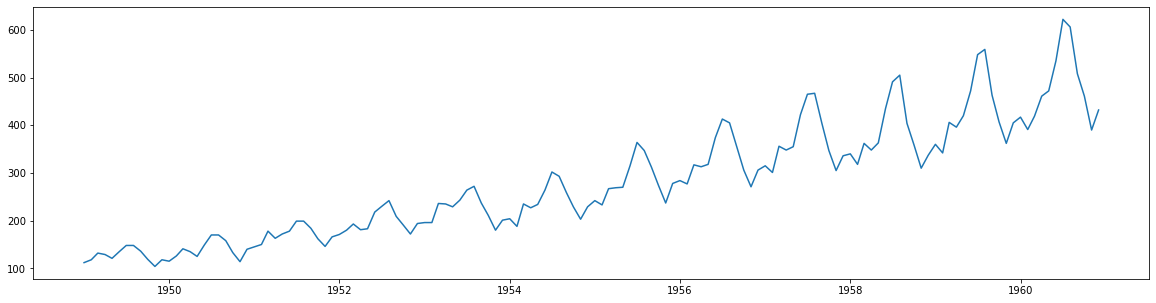

In [16]:
plt.plot(ts)

In [17]:
## we can check the stationary in time series using 2 methods

## Rolling Statistics

In [18]:
# A stationary time series is a data that has a constant mean and constant variance. If I take a mean of T1 and T2 and 
# compare it with the mean of T4 and T5 then is it the same, and if different, how much difference is there? 
# So, constant mean means this difference should be less, and the same with variance.

In [19]:
def rolling_statistice(data):
    
    rolmean = pd.Series(data).rolling(window=12).mean()
    rolstd = pd.Series(data).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(data, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

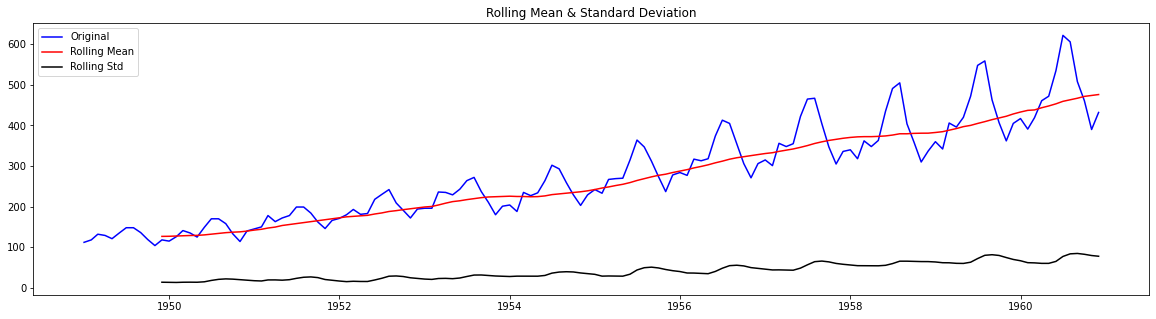

In [20]:
rolling_statistice(ts)

In [21]:
# from the above fig. we can see that the mean is not constant , so the ts isn jnot stationary

## Augmented Dickey Fuller test (ADF Test)

### Null Hypothesis (H0)- Time Series is Not-Stationary

### Alternate Hypothesis (H1)- Time Series Stationary

In [22]:
from statsmodels.tsa.api import adfuller

In [23]:
adfuller_result = adfuller(ts)

In [24]:
print(f'ADF Statistic: {adfuller_result[0]}\n')
print(f'p-value: {adfuller_result[1]}\n')
for key, value in adfuller_result[4].items():
    print(f'Critial Values: {key}, {value}')
#     print(f'   {key}, {value}')

ADF Statistic: 0.8153688792060543

p-value: 0.9918802434376411

Critial Values: 1%, -3.4816817173418295
Critial Values: 5%, -2.8840418343195267
Critial Values: 10%, -2.578770059171598


In [25]:
## ADA test for 95% confidence ( alpha is 0.05)

def adafuller_test(data, alpha):
    result=adfuller(data)
    
    print(f'ADF Statistic: {result[0]}\n')
    print(f'p-value: {result[1]}\n')
    
    for key, value in adfuller_result[4].items():
        print(f'Critial Values: {key}, {value}')
    
    if result[1] <= alpha:
        print(f"\nFor Significance level ({alpha}), there is Strong evidence against H0 , Reject H0, Time Series is Stationary")
    else:
        print(f"\nFor Significance level ({alpha}), there is Weak evidence against H0 , Fail to reject H0, Time Series is Not-Stationary ")
        

In [26]:
adafuller_test(ts, 0.05)

ADF Statistic: 0.8153688792060543

p-value: 0.9918802434376411

Critial Values: 1%, -3.4816817173418295
Critial Values: 5%, -2.8840418343195267
Critial Values: 10%, -2.578770059171598

For Significance level (0.05), there is Weak evidence against H0 , Fail to reject H0, Time Series is Not-Stationary 


## How to make a Time Series Stationary?

## 1. Estimating & Eliminating Trend

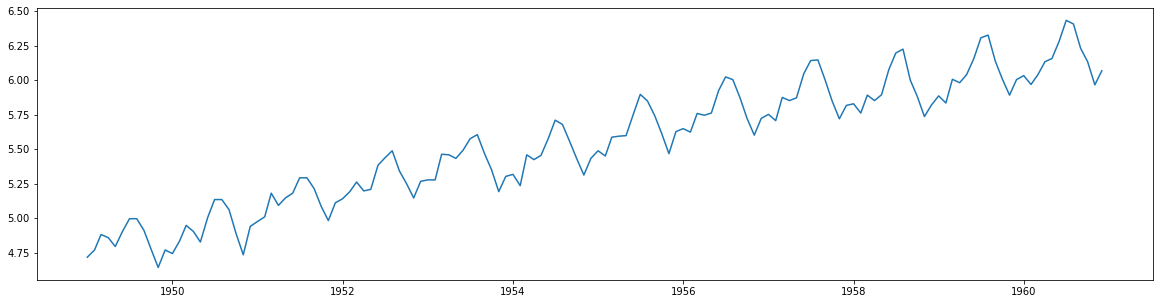

In [27]:
ts_log = np.log(ts)
plt.plot(ts_log)

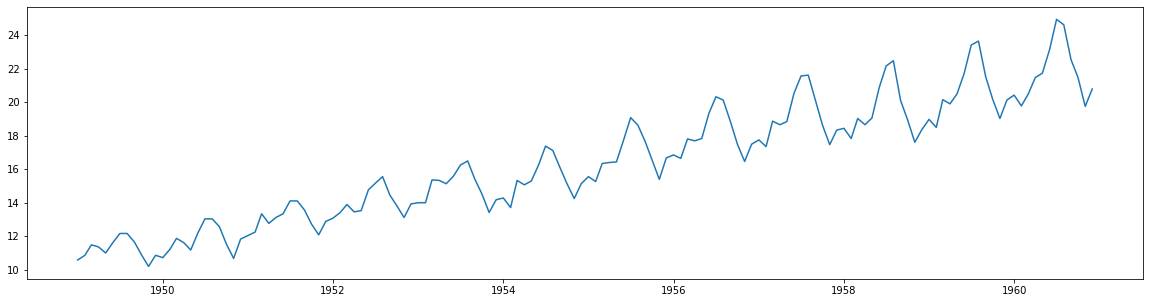

In [28]:
ts_sqrt = np.sqrt(ts)
plt.plot(ts_sqrt)

## 2. Moving average

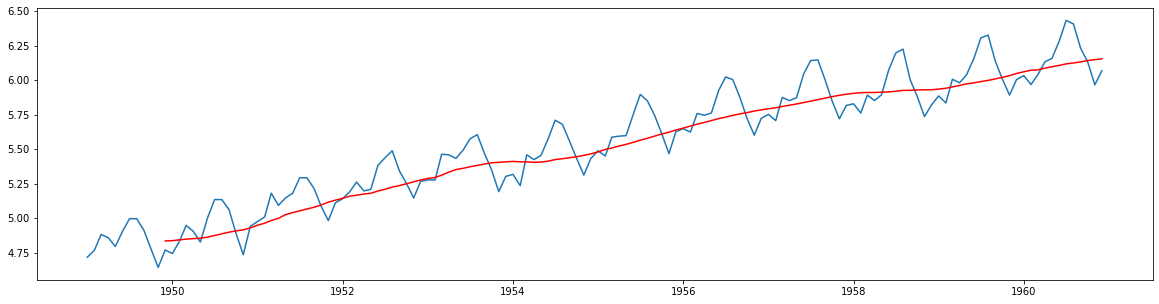

In [29]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [30]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [31]:
ts_log_moving_avg_diff.dropna(inplace=True)

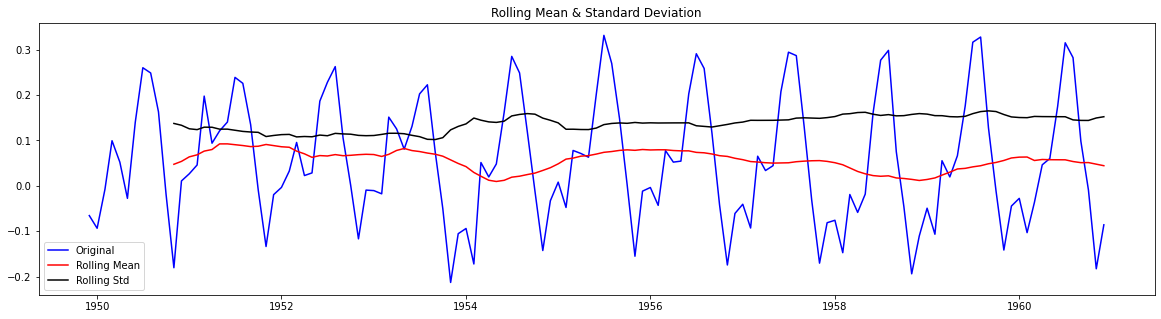

In [32]:
rolling_statistice(ts_log_moving_avg_diff)

In [33]:
adafuller_test(ts_log_moving_avg_diff, 0.05)

ADF Statistic: -3.1629079913008784

p-value: 0.022234630001242536

Critial Values: 1%, -3.4816817173418295
Critial Values: 5%, -2.8840418343195267
Critial Values: 10%, -2.578770059171598

For Significance level (0.05), there is Strong evidence against H0 , Reject H0, Time Series is Stationary


In [34]:
## The simple trend reduction techniques discussed before don’t work in all cases, particularly the ones with high seasonality.

In [35]:
# Differencing – taking the differece with a particular time lag
# Decomposition – modeling both trend and seasonality and removing them from the model.

## 3. Differencing

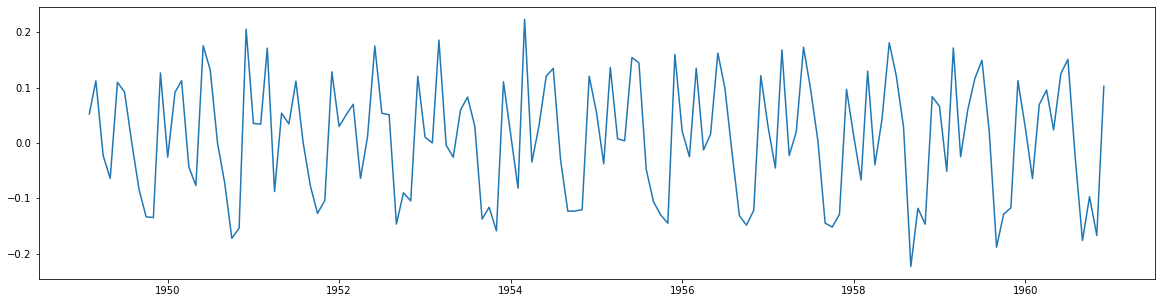

In [118]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [121]:
ts_log_diff.dropna(inplace=True)
adafuller_test(ts_log_diff,0.10)

ADF Statistic: -2.7171305983881595

p-value: 0.07112054815085424

Critial Values: 1%, -3.4816817173418295
Critial Values: 5%, -2.8840418343195267
Critial Values: 10%, -2.578770059171598

For Significance level (0.1), there is Strong evidence against H0 , Reject H0, Time Series is Stationary


In [115]:
# ts_log_diff = ts_log - ts_log.shift(2)
# plt.plot(ts_log_diff)

In [117]:
# ?/adafuller_test(ts_log_diff.dropna(),0.05)

## 4. Decomposing

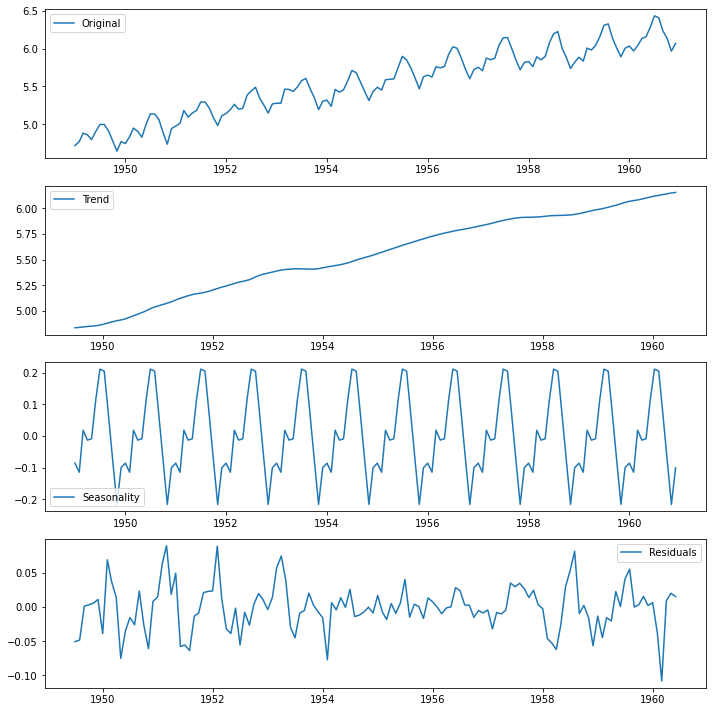

In [107]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [108]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

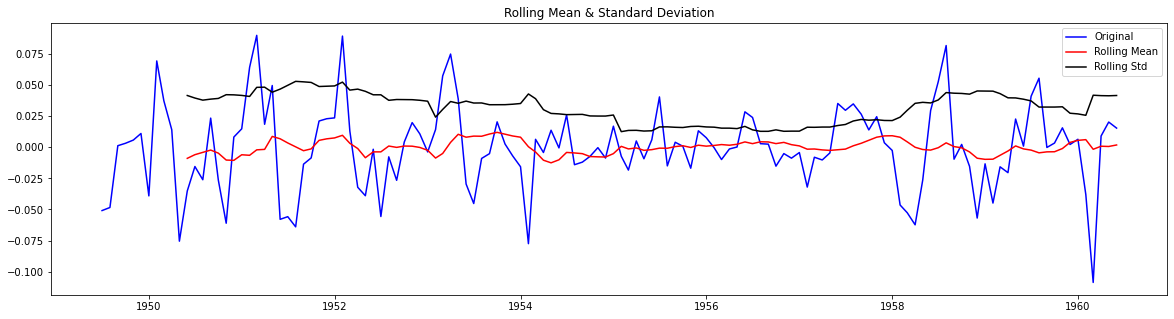

In [109]:
rolling_statistice(ts_log_decompose)

In [112]:
adafuller_test(ts_log_decompose,0.01)

ADF Statistic: -6.332386797644868

p-value: 2.8850589033233625e-08

Critial Values: 1%, -3.4816817173418295
Critial Values: 5%, -2.8840418343195267
Critial Values: 10%, -2.578770059171598

For Significance level (0.01), there is Strong evidence against H0 , Reject H0, Time Series is Stationary
